In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
datapath="F:/college/bca_college/sixth sem/project/code/backend/email_dataset.csv"
df=pd.read_csv(datapath)
df.head()

,From,Subject,Body,SenderDomain,HasURL,NumURLs,NumCC,NumBCC,Label
0,startnow2002@hotmail.com,[ILUG] STOP THE MLM INSANITY,Greetings!\n\nYou are receiving this letter be...,hotmail.com,1,1,0,0,spam
1,lmrn@mailexcite.com,"Real Protection, Stun Guns! Free Shipping! Ti...","<html>\n<body>\n<center>\n<h3>\n<font color=""b...",mailexcite.com,1,2,0,0,spam
2,amknight@mailexcite.com,"New Improved Fat Burners, Now With TV Fat Abso...","<html>\n<body>\n<center>\n<b>\n<font color=""bl...",mailexcite.com,1,2,0,0,spam
3,jordan23@mailexcite.com,"New Improved Fat Burners, Now With TV Fat Abso...","<html>\n<body>\n<center>\n<b>\n<font color=""bl...",mailexcite.com,1,2,0,0,spam
4,yyyy@pluriproj.pt,"Never Repay Cash Grants, $500 - $50,000, Secre...","<html><xbody>\n<hr width = ""100%"">\n<center><h...",pluriproj.pt,1,2,0,0,spam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From          4184 non-null   object
 1   Subject       4176 non-null   object
 2   Body          4147 non-null   object
 3   SenderDomain  4184 non-null   object
 4   HasURL        4189 non-null   int64 
 5   NumURLs       4189 non-null   int64 
 6   NumCC         4189 non-null   int64 
 7   NumBCC        4189 non-null   int64 
 8   Label         4189 non-null   object
dtypes: int64(4), object(5)
memory usage: 294.7+ KB


In [5]:
df.describe()

,HasURL,NumURLs,NumCC,NumBCC
count,4189.000000,4189.000000,4189.000000,4189.0
mean,0.811411,7.303891,1.052280,0.0
std,0.391229,53.607808,5.965788,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,1.000000,2.000000,0.000000,0.0
75%,1.000000,3.000000,0.000000,0.0
max,1.000000,3133.000000,97.000000,0.0


In [6]:
df=df.drop(columns=["NumBCC"])

In [7]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.duplicated().sum()

200


np.int64(0)

In [8]:
df.isna().sum()

From             5
Subject         12
Body            39
SenderDomain     5
HasURL           0
NumURLs          0
NumCC            0
Label            0
dtype: int64

In [9]:
df=df.dropna(subset=["From"])

In [10]:
df.isna().sum()

From             0
Subject         11
Body            39
SenderDomain     0
HasURL           0
NumURLs          0
NumCC            0
Label            0
dtype: int64

In [11]:
df["Subject"]=np.where(df["Subject"].isna(),"",df["Subject"])
df["Body"]=np.where(df["Body"].isna(),"",df["Body"])

In [12]:
df.isna().sum()

From            0
Subject         0
Body            0
SenderDomain    0
HasURL          0
NumURLs         0
NumCC           0
Label           0
dtype: int64

In [13]:
x=df.drop('Label',axis=1)
y=np.array([1 if lbl=="spam" else 0 for lbl in df["Label"]])

In [14]:
x_train_demo,x_test_demo,y_train_demo,y_test_demo=train_test_split(x,y,test_size=0.2,random_state=42)
x_test_sample=x_test_demo.head(7)
y_test_sample=y_test_demo[:7]
x_test_sample

,From,Subject,Body,SenderDomain,HasURL,NumURLs,NumCC
419,cgarnett@airfrance.fr,Government Guarantees Your Success,<html>\n<head>\n <title>Secured Investements\...,airfrance.fr,0,0,0
2650,haldevore@acm.org,Re: From,"\n\n>>>>> On Wed, 9 Oct 2002, ""Jason"" == Jason...",acm.org,1,1,0
701,O@mx.serv.net,[SA] 墨水匣批發電子報,nN\u4974\u0371zIpGsiHz\u0367xZAb`Pp!!!\u0426h!...,mx.serv.net,1,2,0
3296,pudge@perl.org,[use Perl] Headlines for 2002-10-01,use Perl Daily Headline Mailer\n\nThis Week on...,perl.org,1,2,0
2442,welch@panasas.com,"Re: ARRRGHHH Had GPG working, now it doesnt.","2 things - first, the switch parser changed in...",panasas.com,1,4,1
1778,beberg@mithral.com,Re: The GOv gets tough on Net Users.....er Pir...,"On Mon, 26 Aug 2002, Joseph S. Barrera III wro...",mithral.com,1,1,1
3839,rssfeeds@example.com,Ehiogu fills the Ferdinand gap,"URL: http://www.newsisfree.com/click/-1,862212...",example.com,1,1,0


In [15]:
vec_from=TfidfVectorizer()
vec_domain=TfidfVectorizer()
vec_sub=TfidfVectorizer()
vec_body=TfidfVectorizer(max_features=5000)

In [16]:
x_from=vec_from.fit_transform(x["From"])
x_sub=vec_sub.fit_transform(x["Subject"])
x_domain=vec_domain.fit_transform(x["SenderDomain"])
x_body=vec_body.fit_transform(x["Body"])

In [17]:
numeric_features = x[['NumURLs', 'NumCC']].values
has_url=x[["HasURL"]].values
scaler=StandardScaler()
x_numeric = scaler.fit_transform(numeric_features)
x = hstack([x_from, x_sub, x_body, x_domain, x_numeric,has_url])


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3187, 14627), (797, 14627), (3187,), (797,))

Logistic Regression
	Precision: 0.9829931972789115
	Recall: 0.9897260273972602
	F1: 0.9863481228668942
	Accuracy: 0.9899623588456713
[[500   5]
 [  3 289]]


Text(0.5, 1.0, 'confusion matrix')

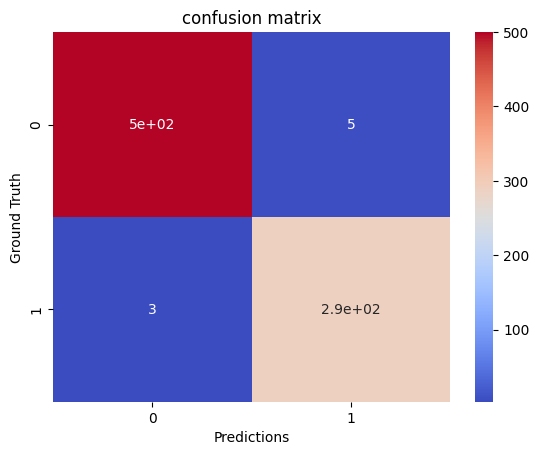

In [19]:
lr_clf=LogisticRegression(
     penalty='l2',
    C=1.0,
    solver='liblinear',        # better for small/medium binary datasets
    max_iter=2000,
    class_weight='balanced',   # very important for spam vs ham
    random_state=42
)
lr_clf.fit(x_train,y_train)
y_pred=lr_clf.predict(x_test)
print('Logistic Regression')
print('\tPrecision:',precision_score(y_test,y_pred))
print('\tRecall:',recall_score(y_test,y_pred))
print('\tF1:',f1_score(y_test,y_pred))
print('\tAccuracy:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

Decision Tree
	Precision: 0.8963210702341137
	Recall: 0.9178082191780822
	F1: 0.9069373942470389
	Accuracy: 0.93099121706399
[[474  31]
 [ 24 268]]


Text(0.5, 1.0, 'confusion matrix')

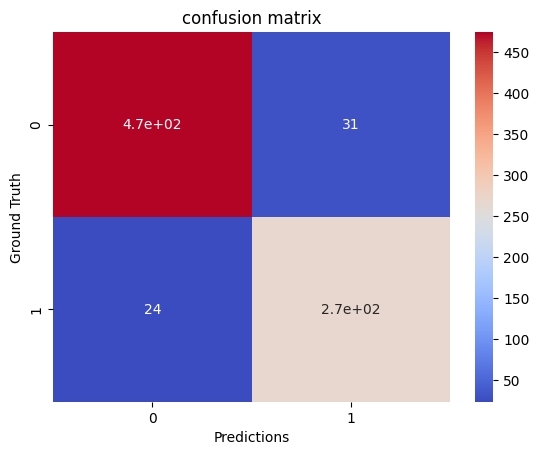

In [25]:
dt_clf=DecisionTreeClassifier(
    # criterion='gini',
    # max_depth=7,
    # min_samples_split=5,
    # min_samples_leaf=2,
    # class_weight='balanced',  # important for spam vs ham
    # random_state=42
)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
print('Decision Tree')
print('\tPrecision:',precision_score(y_test,y_pred_dt))
print('\tRecall:',recall_score(y_test,y_pred_dt))
print('\tF1:',f1_score(y_test,y_pred_dt))
print('\tAccuracy:',accuracy_score(y_test,y_pred_dt))
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

Random Forest
	Precision: 0.9756944444444444
	Recall: 0.9623287671232876
	F1: 0.9689655172413794
	Accuracy: 0.9774153074027604
[[498   7]
 [ 11 281]]


Text(0.5, 1.0, 'confusion matrix')

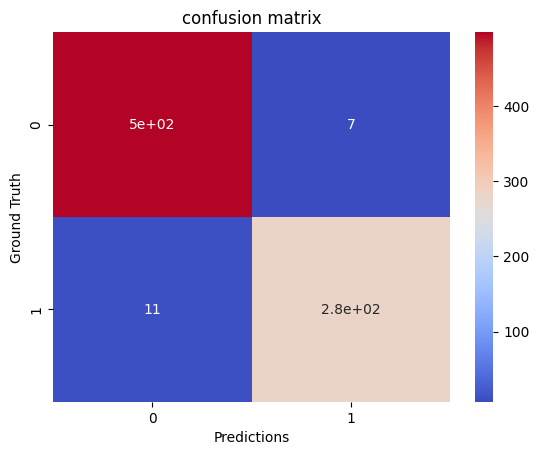

In [21]:
rf_clf=RandomForestClassifier(
     n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',  # critical for spam detection
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
print('Random Forest')
print('\tPrecision:',precision_score(y_test,y_pred_rf))
print('\tRecall:',recall_score(y_test,y_pred_rf))
print('\tF1:',f1_score(y_test,y_pred_rf))
print('\tAccuracy:',accuracy_score(y_test,y_pred_rf))
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

In [22]:
#test of code for check
x_test_sample
y_test_sample

x_test_from=vec_from.transform(x_test_sample["From"])
x_test_sub=vec_sub.transform(x_test_sample["Subject"])
x_test_domain=vec_domain.transform(x_test_sample["SenderDomain"])
x_test_body=vec_body.transform(x_test_sample["Body"])


test_numeric_features = x_test_sample[['NumURLs', 'NumCC']].values
test_has_url=x_test_sample[["HasURL"]].values
x_test_numeric = scaler.transform(test_numeric_features)
x_converted_sample = hstack([x_test_from, x_test_sub, x_test_body, x_test_domain, x_test_numeric,test_has_url])

y_pred_sample=lr_clf.predict(x_converted_sample)

pd.DataFrame({
    'y_test':y_test_sample,
    'y_pred':y_pred_sample
}).head(20)

,y_test,y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0


In [23]:
import joblib

joblib.dump(lr_clf,'email_model.pkl')
joblib.dump(vec_sub,'sub_vectorizer.pkl')
joblib.dump(vec_domain,'domain_vectorizer.pkl')
joblib.dump(vec_body,'body_vectorizer.pkl')
joblib.dump(vec_from,'from_vectorizer.pkl')
joblib.dump(scaler,'email_scaler.pkl')

['email_scaler.pkl']